In [1]:
#Classification Systems

In [ ]:
pip install matplotlib

In [ ]:
pip install pandas

In [ ]:
pip install --upgrade scikit-learn

In [3]:
from sklearn.datasets import fetch_openml

In [5]:
mnist = fetch_openml('mnist_784',version=1,parser = 'auto')

In [6]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [7]:
X,y = mnist["data"],mnist["target"]

In [8]:
# There are 70000 images and each image has 784 features because each image is 28x28 pixels
X.shape

(70000, 784)

In [9]:
y.shape

(70000,)

In [10]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [11]:
if isinstance(X, pd.DataFrame):
    X = X.to_numpy()

if isinstance(y, pd.Series):
    y = y.to_numpy()

In [68]:
some_digit = X[0]


In [70]:
some_digit_image = some_digit.reshape(28,28)

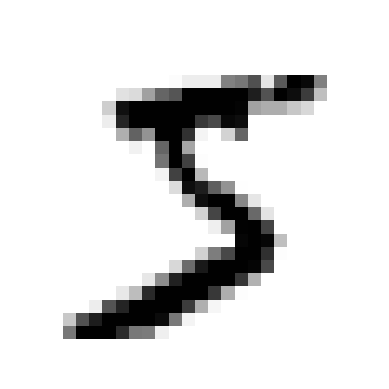

In [72]:
plt.imshow(some_digit_image,cmap="binary")
plt.axis("off")
plt.show()

In [74]:
# The above image looks like a five and that is what this label also tells us
y[0]

5

In [76]:
# Now that the label is a string but most ML algos expect numbers so we cast y as an integer
y = y.astype(np.uint8)

In [78]:
# We created a training and a test set which has already been shuffled for us so we dont need to randomise it
X_train,X_test,y_train,y_test = X[:60000],X[60000:],y[:60000],y[60000:]

In [80]:
# Training a Binary Classifier [ A 5-detector ]

In [82]:
y_train_5 = (y_train == 5)

In [84]:
y_test_5 = (y_test == 5)

In [86]:
from sklearn.linear_model import SGDClassifier

In [88]:
#The SGDClassifier relies on randomness during training. So to get reproducible results we set the random_state parameter.
sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train,y_train_5)

SGDClassifier(random_state=42)

In [89]:
sgd_clf.predict([some_digit])

array([ True])

In [102]:
#Measuring accuracy using cross-validation

In [110]:
#Using cross_val_score in built function from Scikit-Learn

In [106]:
from sklearn.model_selection import cross_val_score

In [164]:
cross_val_score(sgd_clf,#Our sgd model we just trained
                X_train,#training examples
                y_train_5,#targets
                cv=3,#No of folds =3
                scoring="accuracy")
#prints out the acccuracy of each fold

array([0.95035, 0.96035, 0.9604 ])

In [112]:
#implementing cross verification

In [116]:
from sklearn.model_selection import StratifiedKFold

In [118]:
from sklearn.base import clone

In [122]:
skfolds = StratifiedKFold(n_splits=3)

In [124]:

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred)) # prints 0.9502, 0.96565, and 0.96495

0.95035
0.96035
0.9604


In [128]:
#a not-5 clasifier

In [130]:
from sklearn.base import BaseEstimator

In [134]:
class Never5Classifier(BaseEstimator):
    def fit(self,X,y=None):
        pass
    def predict(self,X):
        return np.zeros((len(X),1),dtype=bool)

In [136]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf,X_train,y_train_5,cv=3,scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

In [140]:
#Confusion Matrix
# The general idea is to count the number of times instances of class A are
# classified as class B. For example, to know the number of times the classifier confused
# images of 5s with 3s, you would look in the fifth row and third column of the confu‐
# sion matrix.

In [142]:
from sklearn.model_selection import cross_val_predict

In [144]:
y_train_pred = cross_val_predict(sgd_clf,X_train,y_train_5,cv=3)

In [150]:
from sklearn.metrics import confusion_matrix

In [152]:
confusion_matrix(y_train_5,y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

In [154]:
from sklearn.metrics import precision_score, recall_score

In [156]:
precision_score(y_train_5,y_train_pred)

0.8370879772350012

In [158]:
recall_score(y_train_5,y_train_pred)

0.6511713705958311

In [160]:
from sklearn.metrics import f1_score

In [162]:
f1_score(y_train_5,y_train_pred)

0.7325171197343847

In [166]:
#Precision/ Recall Trade-Off

In [168]:
y_scores = sgd_clf.decision_function([some_digit])

In [172]:
y_scores

array([2164.22030239])

In [174]:
threshold = 0

In [176]:
y_some_digit_pred = (y_scores > threshold)

In [178]:
threshold = 8000

In [180]:
y_some_digit_pred = (y_scores>threshold)

In [182]:
y_some_digit_pred

array([False])

In [184]:
# This confirms that raising the threshold decreases recall. The image actually repre‐
# sents a 5, and the classifier detects it when the threshold is 0, but it misses it when the
# threshold is increased to 8,000.

In [186]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
method="decision_function")

In [188]:
from sklearn.metrics import precision_recall_curve

In [190]:
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

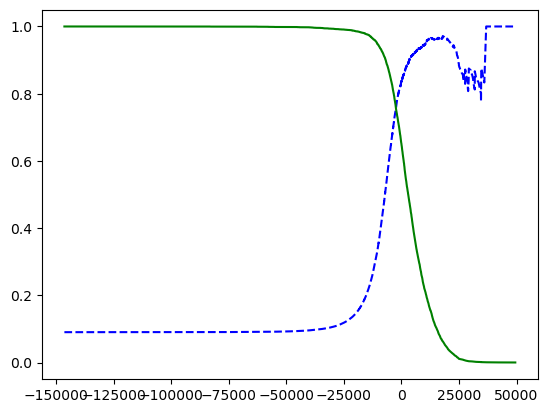

In [192]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
     # highlight the threshold and add the legend, axis label, and grid
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [200]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]
y_train_pred_90 = (y_scores>=threshold_90_precision)

In [202]:
precision_score(y_train_5,y_train_pred_90)

0.9000345901072293

In [204]:
recall_score(y_train_5,y_train_pred_90)

0.4799852425751706